# STAT 201 Group 8 Final Project:
## Comparing the Mean Differences of Daily Step Count for Male vs Female University Students


- Jellia Ma
- Soyoung Jeong
- Nika Karimi Seffat
- Zachary Ferguson

## Introduction:

A post-pandemic world has brought about detrimental mental health issues and enhanced sedentary behavior; however, physical exercise, like walking, alleviates anxiety and increases energy levels (Sharma, 2006). An accessible and measurable tool to calculate step counts is with our phones; almost all phones embed the ‘Health’ application, which tracks one’s daily steps. With men and women exhibiting different leisure habits, we were interested in studying if a discrepancy existed in their walking behaviors. Men tend to be more active than women, due to social factors, (Azevedo, 2007), however, we wanted to examine this specifically on university students.

Our dataset will be comprised of the raw daily step counts of 5 female and 5 male students, dispersed over 2 weeks. The dataset will be organized into an excel sheet, with our variable of interest being daily step counts, spread across 2 categories of gender (male/female). The location parameter of interest is the difference in mean step counts between genders, and we will calculate the standard deviation to understand the sampling variation.

We attempted to mimic UBC’s student gender distribution of 51% female and 49% male students (Sadiq & Averill, 2023) by creating a 50/50 distribution across these categories. We will compute 95% confidence intervals and hypotheses using both the simulated bootstrapping and asymptotic methods; we have tried to minimize our limitations and therefore assume that we satisfy CLT conditions.

##### **Research Question**: Is there a difference between the mean daily step count of male ($\mu_m$) vs female ($\mu_w$) students in university?
##### Null Hypothesis: $\mu_m - \mu_f$ = 0
##### Alternative Hypothesis: $\mu_m - \mu_f$ ≠ 0

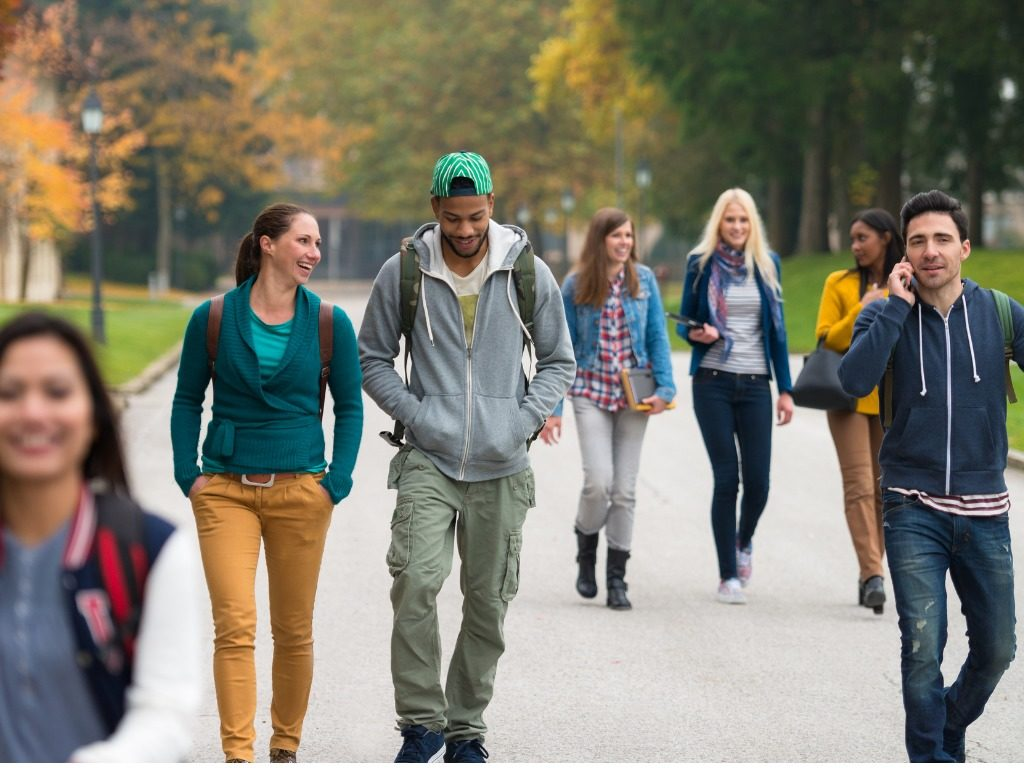
<div style="text-align: center"><i>Image from <a href="https://www.higheredtoday.org/wp-content/uploads/2019/04/Students-walking-on-campus.jpg">higheredtoday.com</i></a></div>
<br>



## Preliminary Results




In [1]:
#First, we load the necessary packages to perform our analysis in R using the library() function.
library(cowplot)
library(dplyr)
library(gridExtra)
library(tidyverse)
library(repr)
library(infer)
library(repr)
library(broom)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ stringr 1.4.1
✔ tidyr   1.2.1     ✔ forcats 0.5.2
✔ readr   2.1.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ gridExtra::combine() masks dplyr::combine()
✖ dplyr::filter()      masks stats::filter()
✖ dplyr::lag()         masks stats::lag()


#### Data Reading & Tidying

In [2]:
#Reading our raw data set into Jupyter Notebook
stepcount_data <- read_csv("https://raw.githubusercontent.com/Jellia1225/STAT201-Group-8-Foot-Step-Project/87d7bed3c70f2afb2cc10c14a852019310c33208/STAT201%20Dataset%20for%20Foot%20Steps%20Group%208.csv")
head(stepcount_data)

Rows: 10 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Name, Gender
dbl (14): Steps_2.27, Steps_2.28, Steps_3.1, Steps_3.2, Steps_3.3, Steps_3.4...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Name,Gender,Steps_2.27,Steps_2.28,Steps_3.1,Steps_3.2,Steps_3.3,Steps_3.4,Steps_3.5,Steps_3.6,Steps_3.7,Steps_3.8,Steps_3.9,Steps_3.10,Steps_3.11,Steps_3.12
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Gabriella,F,10536,8684,6633,5526,2842,10923,7124,10229,8537,7699,7116,8226,5665,5492
Yoki,F,6378,2431,5212,6232,2241,7334,1332,11720,4775,9025,8127,3411,3004,5302
Mary,F,9648,8035,9436,13271,7118,3449,5254,8633,8845,8305,6584,13099,19000,10312
Ars,M,10337,1545,9631,5877,6189,8576,5552,7716,8174,9732,5736,9312,6850,2320
Anna,F,4472,6361,1443,3842,2362,1075,180,2250,6787,1208,4178,1292,297,252
Alex,M,2269,3779,7078,4584,4217,10310,8672,8802,10217,6578,6759,9503,7343,8465


In [3]:
#We will exclude the "Name" column from our analysis & keep all other columns.
stepcount <- stepcount_data %>%
             select(Gender:Steps_3.12)

# We renamed the columns that included the step counts for each day from 1-14 for simplicity.
colnames(stepcount) <- c("gender", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14")

#Organizing the table into three columns: gender, day, and step counts.
stepcount <- stepcount %>%
             pivot_longer(!gender, names_to = "day", values_to = "stepcount")

head(stepcount)

gender,day,stepcount
<chr>,<chr>,<dbl>
F,1,10536
F,2,8684
F,3,6633
F,4,5526
F,5,2842
F,6,10923


### Obtaining Estimates - Sample Size(s), Sample Average, and Sample Standard Deviation for Each Gender

In [4]:
#Grouping genders to calculate sample size (n), sample average for daily step count, and sample standard deviation.
stepcount_estimates <- stepcount %>%
                       group_by(gender) %>%
                       summarise(n = n(),
                       x_bar = mean(stepcount),
                       sd = sd(stepcount),
                       `.groups` = "drop") %>% 
                       pivot_wider(names_from = gender, values_from = c(n, x_bar, sd))
                           
stepcount_estimates

n_F,n_M,x_bar_F,x_bar_M,sd_F,sd_M
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
70,70,7198.314,7330.414,4281.599,2284.773


**Table 1: Summary Statistics for Each Gender**

We obtained a _total_ of 140 samples and created an equitable 50/50 distribution for each gender, making their sample sizes (_n_) 70 each. The sample daily average step count for females is 7198.314, and for males the sample mean is 7330.414. The spread (standard deviation) for the female population is almost 2x larger than the male population - for females, it is 4281.599 and for males it is 2284.773. 

### Data Plotting

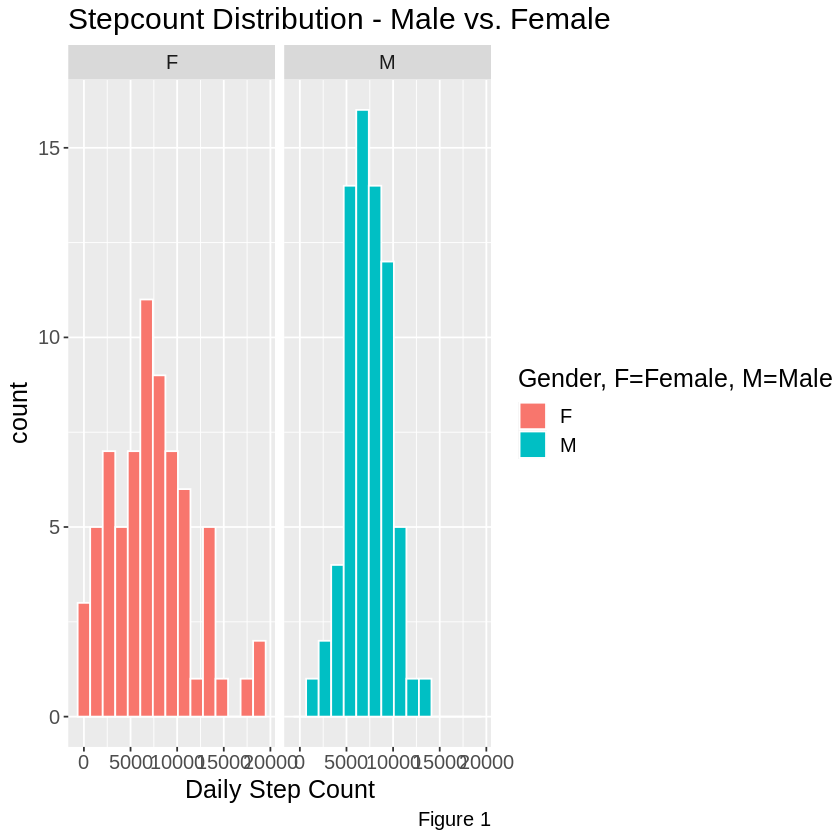

In [5]:
#Plot a histogram to compare the distributions between male & females, examine for peaks/outliers/skewness, and see the spread.
#The histogram is useful in investigating the individual spreads and shapes of each distribution.
options(repr.plot.width = 7, repr.plot.height = 7)

stepcount_plot_dist <- stepcount %>%
                       ggplot() + 
                       geom_histogram(aes(stepcount, fill=gender), color = 'white', bins = 15) + 
                       facet_wrap(~gender, scales = "fixed") +
                       labs(x = "Daily Step Count", fill = "Gender, F=Female, M=Male", caption = "Figure 1") +
                       ggtitle("Stepcount Distribution - Male vs. Female")+
                       theme(text = element_text(size = 15))

stepcount_plot_dist

The step count distributions are approximately symmetrical and resemble the normal distribution. There are no alarming peaks or outliers, and both are unimodal. They are centered around their sample means, both around 7000, however, it is visually evident that the female population has significantly higher spread while the male population is clustered more around the mean with less variance.

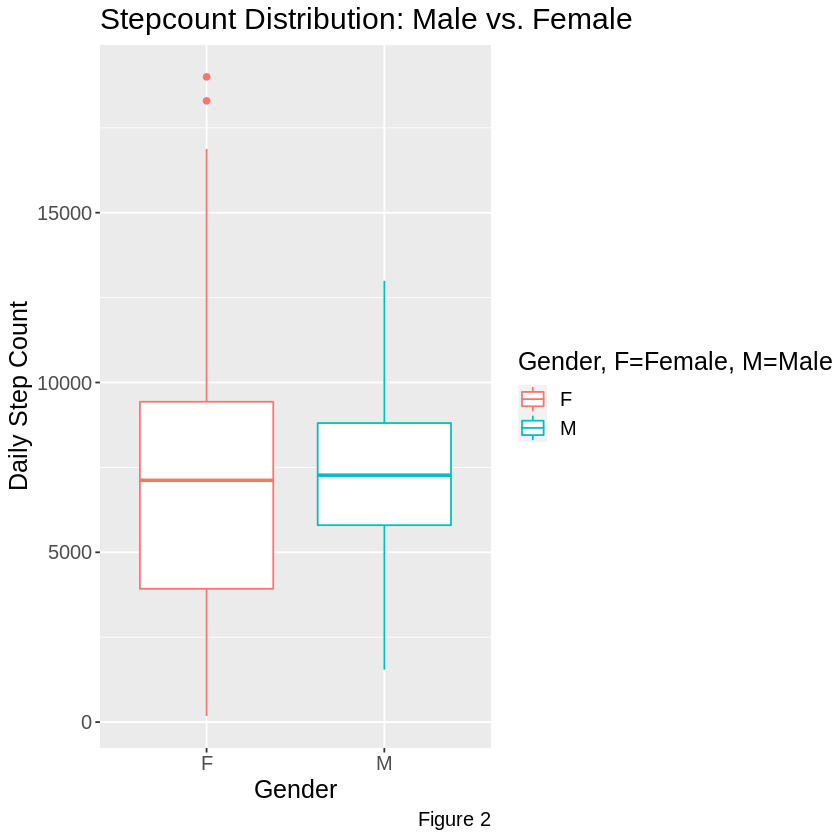

In [6]:
#We will now graph boxplots as a visual comparison of the 2 variables
stepcount_plot_box <- stepcount %>%
                      ggplot() +
                      geom_boxplot(aes(x = gender, stepcount, color = gender)) +
                      ggtitle("Stepcount Distribution: Male vs. Female") + 
                      xlab("Gender") + 
                      ylab("Daily Step Count") + 
                      labs(caption="Figure 2", color="Gender, F=Female, M=Male")+
                      guides(fill = "none")+
                      theme(text = element_text(size = 15))

stepcount_plot_box

The means of the daily step counts for each gender are visually very close together in the boxplot. There is not much between-group variability, however, females seem to have larger within-group variability.

### Hypothesis Testing: 2 Sample T-Test to Compare the Means of Independent Populations

We will now perform an asymptotic hypothesis test; first, we will manually calculate the observed test difference, standard error, then p-value to obtain our results, then use R's t.test function to ensure accuracy in our calculations. Our sample somewhat fulfills the conditions of the Central Limit Theorem - the sample size is bigger than 30, the estimator (the mean) is a sum of random components, and while our sample was not taken completely randomly, we made it as representative of the UBC population as possible to ensure reliable and valid inferences are made about the population.

In [7]:
#Using a theory based approach for the hypothesis test.
#Calculating the observed test statistic (X bar Male - X bar Female), following the order of the null/alternative hypotheses.
#Calculating the standard error of the test statistic (this is under the null model).
#Finally, calculating the p value - this is a two tailed test, and it is a t distirbution because we are using the sample standard deviation.
    # The degrees of freedom is only an approximate.
stepcount_estimates <- stepcount_estimates%>%
                            mutate(mean_diff = x_bar_M - x_bar_F)%>%
                            mutate(std_error = sqrt(((sd_M)^2 / n_M) + ((sd_F)^2 / n_F)))%>%
                            mutate(p_value = 2 * pt(mean_diff/std_error, df = nrow(stepcount) - 1, lower.tail = FALSE))
stepcount_estimates

n_F,n_M,x_bar_F,x_bar_M,sd_F,sd_M,mean_diff,std_error,p_value
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
70,70,7198.314,7330.414,4281.599,2284.773,132.1,580.0526,0.8201846


**Table 2: Summary of Calculated Hypothesis Test with P-value**

The p-value that was obtained (0.8201846) is extremely high, indicating the probability of obtaining a test statistic as extreme/more extreme than the one observed, under the null hypothesis, is quite high. The observed data is consistent with the null hypothesis, that there is no difference between genders.

Now, we will use R's t.test function to obtain a hypothesis test - the result will likely differ by a bit because it will be using _exact_ degrees of freedom, whereas previously we only used an approximate.

In [8]:
#isolating vector of only male participants
stepcount_male <- stepcount %>%
    filter(gender == "M") %>%
    select(stepcount)

#isolating vector of only female participants
stepcount_female <- stepcount %>%
    filter(gender == "F") %>%
    select(stepcount)

#t.test comparing both vectors, and again doing a two-sided test
t_test <- tidy(
   t.test(x = stepcount_female,
         y = stepcount_male,
         alternative = "two.sided"))
t_test

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
-132.1,7198.314,7330.414,-0.227738,0.8202914,105.349,-1282.193,1017.993,Welch Two Sample t-test,two.sided


**Table 3: Hypothesis Test Results with P Value using R's T.Test Function**

The p value for our t-test is 0.820291365557718; this suggests we have very little reason to doubt the null hypothesis. It is very close to the p-value obtained in table 2.

### Bootstrapping - Hypothesis Test

Now, we will complete a bootstrapping hypothesis test and compare our results with the previous asymptotic results.

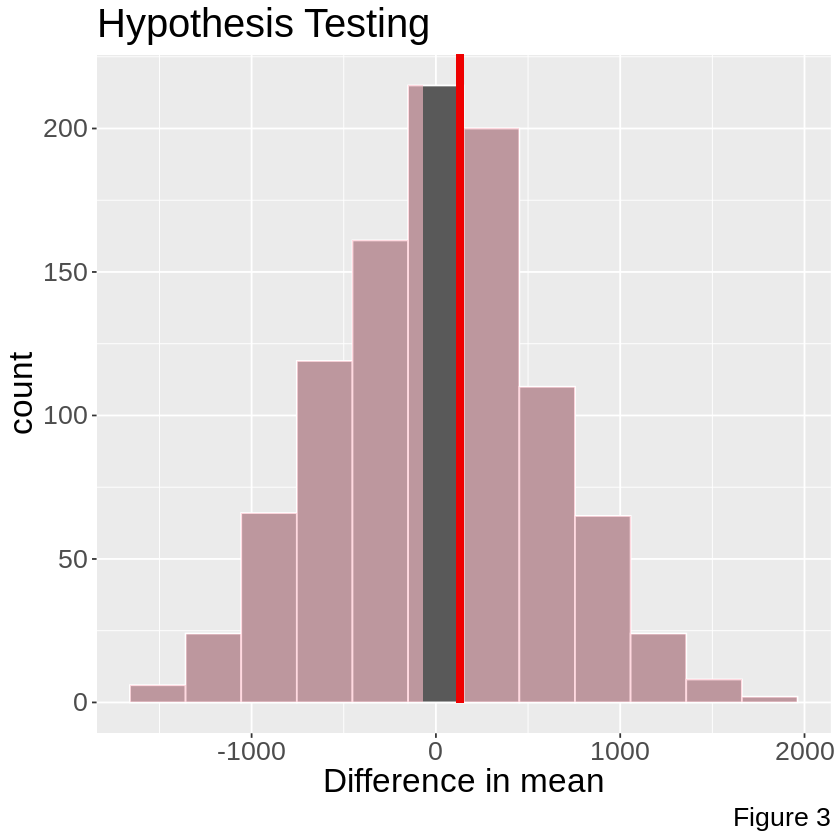

In [9]:
#Set seed to ensure a reproducible code
set.seed(2106)

people_count <-
    stepcount %>% 
    count(gender)

#Calculate the observed test statistic with the infer package. Male's mean minus Female's mean.
obs_diff_in_means <- 
    stepcount  %>% 
    specify(formula = stepcount ~ gender) %>%
    calculate(stat = "diff in means", order = c("M", "F"))

#Obtaining null distribution (test statistic under null hypothesis). Using the infer workflow, we generated 1000 samples.
null_obs_diff_in_means <- 
    stepcount  %>% 
    specify(formula = stepcount ~ gender) %>%
    hypothesize(null = "independence") %>% 
    generate(reps = 1000, type = "permute")  %>%
    calculate(stat = "diff in means", order = c("M", "F"))

#plotting hypothesis test results
diff_in_means_plot <-
    visualize(null_obs_diff_in_means, bins = 12) + 
    shade_p_value(obs_stat = obs_diff_in_means, direction = "both") + # vertical bar for the observed test statistic, shaded the tails
    xlab("Difference in mean") +
    labs(caption="Figure 3")+
    ggtitle("Hypothesis Testing") +
    theme(text = element_text(size = 20))

diff_in_means_plot

The cumulative red shaded area shows the p-value obtained; because the majority of the plot is shaded, it indicates that the difference in means between the two groups is not statistically significant. These values are consistent with the null hypothesis. Now, we will obtain the actual, numerical p-value.

In [10]:
#obtaining p value; direction is both because it is a two-sided test
p_value <-
    null_obs_diff_in_means %>% 
    get_p_value(obs_stat =  obs_diff_in_means, direction = "both")

p_value$p_value[1]

[1] 0.85

This p value is very close to the p value obtained in the asymptotic method (see tables 2 and 3).
Given that both our p-values are greater than .05, we *do not reject the null hypothesis* at the 5% significance level.

### 95% Confidence Interval - Estimated Using CLT Theorem

Now, we will obtain the confidence interval at a 95% confidence level to obtain a plausible range of values of where our population parameter is likely to fall. We use 95% because it is pretty standard, and provides a good balance between a degree of certainty and preciseness.

In [11]:
#obtaining confidence interval

male <- 
    stepcount %>% 
    filter(gender == 'M') %>% 
    pull(stepcount)

female <- 
    stepcount %>% 
    filter(gender == 'F') %>% 
    pull(stepcount)

diff_in_means_ci <- 
    tibble(
        lower_ci = mean(male) - mean(female) - qnorm(0.975) * sqrt(var(male)/length(male) + var(female)/length(female)),
        upper_ci = mean(male) - mean(female) + qnorm(0.975) * sqrt(var(male)/length(male) + var(female)/length(female))
    )

diff_in_means_ci

lower_ci,upper_ci
<dbl>,<dbl>
-1004.782,1268.982


**Table 4: 95% Confidence Interval Using CLT for Estimated Difference in Means**

The 95% confidence interval for the difference in mean stepcount between males and females is -1004.782 (lower bound) to 1268.982 (upper bound). This confidence interval has the value 0 in it - our analysis is *not statistically significant at the 95% confidence level*. 

### 95% Confidence Interval Using Bootstrap Replicates

In [12]:
set.seed(2106) #for consistency and reproducability

#we would like to find the 95% confidence interval for the difference in means with the infer package.
diff_in_means_bootstrap_dist <- 
    stepcount %>%
    specify(formula = stepcount ~ gender) %>%
    generate(reps = 1000, type = "bootstrap") %>%
    calculate(stat = "diff in means", order = c("M", "F")) 

#Use diff_in_means_bootstrap_dist to find the 95% confidence interval(percentile-based confidence interval)
diff_in_means_bootstrap_ci <- 
    diff_in_means_bootstrap_dist %>% 
    get_confidence_interval(level = 0.95, type = "percentile")
diff_in_means_bootstrap_ci



lower_ci,upper_ci
<dbl>,<dbl>
-980.7025,1271.89


**Table 5: 95% Confidence Interval By Using Infer Package**

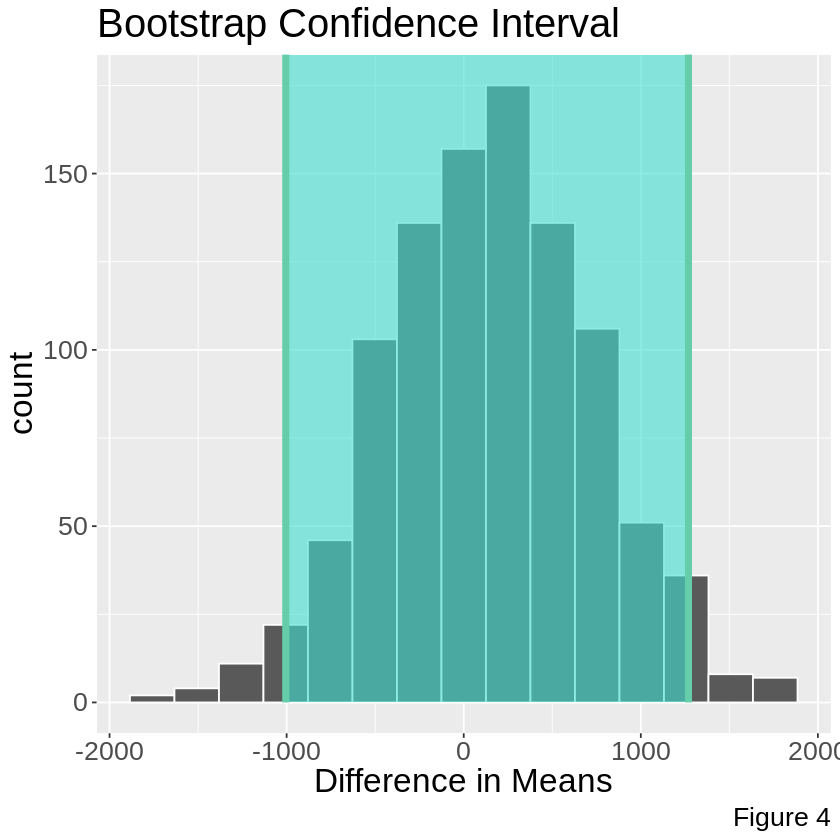

In [13]:
#Visualizing the confidence interval diff_in_means_bootstrap_ci with the bootstrap distribution diff_in_means_bootstrap_dist.
#Notice how 0 is included in this confidence interval

diff_in_means_ci_bootstrap_plot <-
    visualize(diff_in_means_bootstrap_dist) + 
    shade_confidence_interval(endpoints = diff_in_means_ci) + 
    theme(text = element_text(size = 20)) + 
    ggtitle("Bootstrap Confidence Interval")+
    xlab("Difference in Means")+
    labs(caption = "Figure 4")
diff_in_means_ci_bootstrap_plot

We are 95% confident that the true mean difference between stepcount in male and female university students is between -980.7025 and 1271.89. While not perfect, it somewhat aligns with results we obtained in the asymptotic confidence interval, and the ranges are quite similar. They both yielded the same result; the difference is NOT statistically significant and we therefore _fail to reject the null hypothesis at the 95% confidence level_.

### Asymptotic vs Bootstrapping: Which One's Better?

After conducting _both_ methods for hypothesis tests and confidence intervals, we yielded similar numerical values, and failed to reject the null hypothesis in all circumstances. While there isn't a 'better' method, we believe the bootstrapping one is more appropriate for our analysis, as our sample was not entirely random, and it also does not make underlying assumptions about the population, which we had no information about regarding its spread or distribution. Nevertheless, the large sample size and attempt to make our sample generalizable/representative allowed us to assume CLT conditions hold.

### _SUMMARY & IMPLICATION OF FINDINGS_

To summarize, we initially found the sample mean daily footsteps for females to be 7198.314, and for males to be 7330.414. Therefore, the calculated observed difference in average daily footsteps (males minus females) was 132.1. After plotting both histograms and boxplots for each gender, we found similar centers for each distribution, but females had significantly larger spread (variance). 


We then conducted an asymptotic (manual calculations and using R’s t.test function) as well as a bootstrapped hypothesis test. After completing the two-sample asymptotic t-test, we found the p-value to be approximately 0.82. The p-value for the bootstrapped hypothesis test was quite similar, with a value of 0.85; we therefore do not have enough evidence to reject the null hypothesis at the 5% significance level which states there is no difference between university male vs female students’ walking habits. Consequently, there is a possibility of making the Type II error, which would mean the null hypothesis is actually false and there is a statistically significant difference; this would fluctuate with factors such as effect size, significance level, and sample size. We also computed the 95% confidence interval based on the CLT and got a range of [-1004.782, 1268.982] - the bootstrapping confidence interval was quite similar, at a range of [-980.7027, 1271.89]. We are 95% confident that the “difference in means” for the population is between these values, and with 0 included in both these confidence intervals, we do not find a statistically significant difference in our results.
 
Based on these findings, we have not gathered enough evidence to support the argument that the difference in means between the two groups is statistically significant - the null value lies between the confidence interval & the p-value obtained exceeded the significance level of 5%. Thus, we should not reject the null hypothesis, which states that there is no difference in the average daily step count of men and women.
 
In terms of some impacts of our findings, female and male university students have similar amounts of footsteps, which implies they have equal amounts of walking exercise per day. It is delightful to see this result, since physical activities help alleviate anxiety and increase energy levels (Sharma, 2006), and walking is one of the most basic and simple exercises each student can obtain. We can possibly conclude UBC students’ overall physical exercise and energy levels are pretty balanced between both genders - we can utilize this information to create non-gender based activities or policies that further encourage physical involvement of all university students, increasing their mental/overall well-being and health levels.


##### _Advantages_

Our sample population is technologically reliant; they carry their phones with them frequently, and these devices are advanced enough to record step data accurately. There is consistency among our samples, as every data point is recorded from an iPhone, and it was collected at the same time intervals, minimizing the effect of macro influences.

##### _Limitations_

Our sample is made of our group members, and our friends; we chose a sample out of convenience (this arose from a limited reach to certain people & needing private data). To address this, we chose people that studied different majors, and varied habits, to make our sample somewhat generalizable/representative. It is unrealistic to take data from 140 people; we took 14 observations from 10 people, however, we are assuming a sample size of n = 140, like we were taking data from 140 people. 


##### _DID WE EXPECT TO FIND THESE RESULTS?_

We expected to find the opposite and reject our null hypothesis; multiple research studies have found a statistically significant difference regarding gender differences in walking habits, and attributed these differences to social and environmental influences on physical behaviors(Bassett, et al, 2010). Even when surrounding ourselves with male & female college students everyday, we notice how leisure and sports activities are usually partaken by our male classmates. There are underlying psychosocial variables, such as males possessing higher levels of self-efficacy, and greater motivation, leading them to engage in higher levels of physical activity(Edwards, et al, 2016). Women must also account for the greater social & physical threat for walking in public areas; gender-based violence towards women makes them less inclined to use walking as their main commute, especially in less populated areas & during the night, adding in the complex role of safety in physical activity (Schmitt, 2018). 
  
##### _FUTURE QUESTIONS & POSSIBLE STUDIES_

As our study did not reject the null hypothesis that there was a difference in university male and female walking habits, we could explore other variables that cause statistically significant discrepancies in college student walking habits: including but not limited to their major/faculty (regarding proximity to their classes), age or current year standing, their academic performance (measured by GPA), and whether they are commuters or live on campus. We could also extend this study to outside of just UBC; we could examine whether the layout and accessibility of different university campuses significantly affect walking habits, however this would require a greater reach of samples with extended time and energy.

Further research could be done on current campus policies and infrastructure that promote physical activity; this could be placement of sidewalks and green spaces, cleanliness of walking areas, wellness and safety policies, and pedestrian-focused events such as walking tours or outdoor fitness classes. While this is not gender-based, it is still important to understand how universities can indirectly and directly implement policies and activities that support students’ physical health, as it has inherent effects on academic performance, mental well-being, longevity, and cognitive function. Executing these policies could help alleviate discrepancies in walking habits for other variables, including those that were not investigated in this study.



**Final Report Total Word Count: 1970**

## References


Azevedo, M. R., Araújo, C. L., Reichert, F. F., Siqueira, F. V., da Silva, M. C., &amp; Hallal, P. C. (2007). Gender differences in leisure-time physical activity. *International Journal of Public Health*, 52(1), 8–15. https://doi.org/10.1007/s00038-006-5062-1 

Bassett, D. R., Wyatt, H. R., Thompson, H., Peters, J. C., & Hill, J. O. (2010). 
Pedometer-Measured Physical Activity and Health Behaviors in United States Adults. Medicine and Science in Sports and Exercise, 42(10), 1819–1825. https://doi.org/10.1249/MSS.0b013e3181dc2e54  

‌Edwards, E. S., & Sackett, S. C. (2016). Psychosocial Variables Related to Why
Women are Less Active than Men and Related Health Implications. Clinical Medicine Insights: Women’s Health, 9s1, CMWH.S34668. https://doi.org/10.4137/cmwh.s34668 

Sadiq, R., &amp; Averill, G. (2023). (rep.). *University of British Columbia Annual Enrolment Report 2022/23* (p. 35). University of British Columbia. 

Schmitt, Angie (2018). What Explains the Gender Gap in Walking? Streetsblog 
USA. https://usa.streetsblog.org/2018/03/08/what-explains-the-gender-gap-in-walking/

Sharma, A. (2006). Exercise for mental health. *The Primary Care Companion For CNS Disorders*, 8(2). https://doi.org/10.4088/pcc.v08n0208a